# AdaBoosting Algorithm from scratch
https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html

手動與自動之比較。

先手動

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
#importing file
iris = pd.read_csv("iris.csv")  

In [ ]:
iris = iris.drop('Unnamed: 0', axis=1)

In [ ]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
#considering only two classes
example = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

In [ ]:
example.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [ ]:
#replacing the two classes with +1 and -1
example['Label'] = example['Species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
example = example.drop('Species', axis = 1)

In [ ]:
#Initially assign same weights to each records in the dataset
example['probR1'] = 1/(example.shape[0])

In [ ]:
example.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [ ]:
#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [ ]:
example1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
56,6.3,3.3,4.7,1.6,1,0.01
112,6.8,3.0,5.5,2.1,-1,0.01
140,6.7,3.1,5.6,2.4,-1,0.01
79,5.7,2.6,3.5,1.0,1,0.01
76,6.8,2.8,4.8,1.4,1,0.01


In [ ]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4]
y_train = example1.iloc[0:len(iris),4]

In [ ]:
#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(167.4, 163.07999999999998, 'X[2] <= 4.95\ngini = 0.493\nsamples = 100\nvalue = [56, 44]'),
 Text(83.7, 54.360000000000014, 'gini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.071\nsamples = 54\nvalue = [52, 2]')]

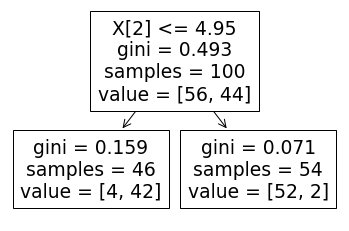

In [ ]:
#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [ ]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred

In [ ]:
example.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
55,5.7,2.8,4.5,1.3,1,0.01,1
56,6.3,3.3,4.7,1.6,1,0.01,1
57,4.9,2.4,3.3,1.0,1,0.01,1
58,6.6,2.9,4.6,1.3,1,0.01,1
59,5.2,2.7,3.9,1.4,1,0.01,1


In [ ]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [ ]:
#error calculation
e1 = sum(example['misclassified'] * example['probR1'])

In [ ]:
e1

0.08

In [ ]:
#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

In [ ]:
#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [ ]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [ ]:
example['prob2'] = round(normalized_weight,4)

In [ ]:
example[example['misclassified'] == 0.0].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054


In [ ]:
example[example['misclassified'] == 1.0].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2
77,6.7,3.0,5.0,1.7,1,0.01,-1,1.0,0.0625
83,6.0,2.7,5.1,1.6,1,0.01,-1,1.0,0.0625
106,4.9,2.5,4.5,1.7,-1,0.01,1,1.0,0.0625
121,5.6,2.8,4.9,2.0,-1,0.01,1,1.0,0.0625
123,6.3,2.7,4.9,1.8,-1,0.01,1,1.0,0.0625


In [ ]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

[Text(167.4, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.428\nsamples = 100\nvalue = [69, 31]'),
 Text(83.7, 54.360000000000014, 'gini = 0.301\nsamples = 38\nvalue = [7, 31]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]')]

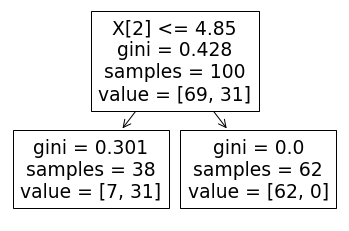

In [ ]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [ ]:
example.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,-1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1


In [ ]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [ ]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.1151

In [ ]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

1.019836664272734

In [ ]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [ ]:
example['prob3'] = round(normalized_weight,4)

In [ ]:
example.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.003
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.003
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,-1,1.0,0.023
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.003
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.003


In [ ]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(167.4, 163.07999999999998, 'X[0] <= 4.95\ngini = 0.394\nsamples = 100\nvalue = [73, 27]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.499\nsamples = 57\nvalue = [30, 27]')]

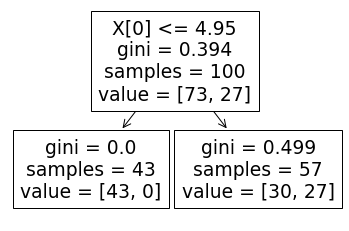

In [ ]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [ ]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [ ]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.27410000000000007

In [ ]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)

In [ ]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [ ]:
example['prob4'] = round(normalized_weight,4)

In [ ]:
example.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,-1,1.0,0.023,-1,1.0,0.0420
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055


In [ ]:
#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(167.4, 163.07999999999998, 'X[0] <= 5.05\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.405\nsamples = 71\nvalue = [20, 51]')]

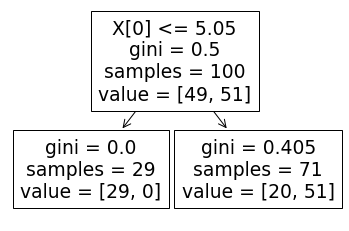

In [ ]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [ ]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [ ]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.26799999999999985

In [ ]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [ ]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.3757676565209744
1.019836664272734
0.4869596304910273
0.5023967667252278


In [ ]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [ ]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
example['final_pred'] = np.sign(list(t))

In [ ]:
example.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,-1,1.0,0.023,-1,1.0,0.0420,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,-1,1.0,1.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.003,-1,1.0,0.0055,1,0.0,1.0


In [ ]:
#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[45,  5],
       [ 1, 49]])

In [ ]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

94.0

使用Adaboost Library

In [ ]:
#Fitting the model using the adaboost classifier library

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
iris = pd.read_csv("iris.csv")  
iris = iris.drop('Unnamed: 0', axis=1)
iris = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

In [ ]:
#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

In [ ]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=4, random_state=0)

In [ ]:
clf.predict([[5.5, 2.5, 4.0, 1.3]])

array(['versicolor'], dtype=object)

In [ ]:
clf.score(X_train, y_train)

0.96